<a href="https://colab.research.google.com/github/SankethDamineni/CodSoft/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
''' ------------------------------------------'''
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", mpl.__version__)
print("seaborn version:", sns.__version__)

Pandas version: 1.5.3
NumPy version: 1.23.5
Matplotlib version: 3.7.1
seaborn version: 0.12.2


# **Reading The dataset:**

In [ ]:
# Read the Iris dataset file
pf= pd.read_csv('/content/drive/MyDrive/archive (2).zip')
print("Done")
pf.head

Done


<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                         

# **Exploring the dataset**

In [ ]:
# dataset columns
pf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
pf.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# drop some columns :
pf= pf.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
print (pf.head())

   Survived  Pclass     Sex   Age     Fare Embarked
0         0       3    male  34.5   7.8292        Q
1         1       3  female  47.0   7.0000        S
2         0       2    male  62.0   9.6875        Q
3         0       3    male  27.0   8.6625        S
4         1       3  female  22.0  12.2875        S


In [ ]:
# print columns after edit:
pf.columns
pf.describe()

,Survived,Pclass,Age,Fare
count,418.000000,418.000000,332.000000,417.000000
mean,0.363636,2.265550,30.272590,35.627188
std,0.481622,0.841838,14.181209,55.907576
min,0.000000,1.000000,0.170000,0.000000
25%,0.000000,1.000000,21.000000,7.895800
50%,0.000000,3.000000,27.000000,14.454200
75%,1.000000,3.000000,39.000000,31.500000
max,1.000000,3.000000,76.000000,512.329200


In [ ]:
pf.isnull().sum()


Survived     0
Pclass       0
Sex          0
Age         86
Fare         1
Embarked     0
dtype: int64

# **Cleaning the dataset**

In [ ]:
# printing the data type of each column in this dataset
print(pf.dtypes)


Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
dtype: object


In [ ]:
pf['Fare'].fillna(pf['Fare'].mean(), inplace=True)
print ("The pf['Fare'] missing val =\t",pf["Fare"].isnull().sum())

The pf['Fare'] missing val =	 0


<Axes: >

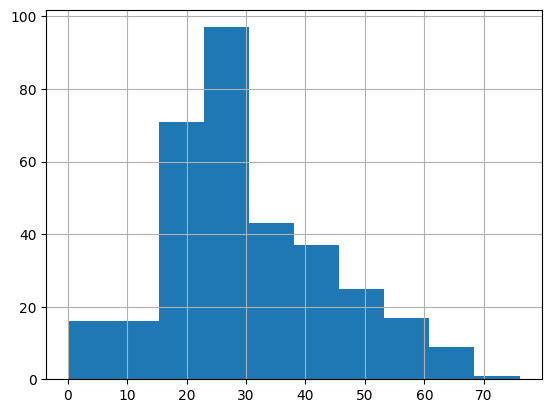

In [ ]:
#before predict the missing values
pf['Age'].hist()

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a subset of the dataset with non-missing age values
age_df = pf[['Survived', 'Pclass', 'Age', 'Fare']]  # Include relevant features

# Split into two subsets: one with missing ages and one without
known_age = age_df.loc[age_df['Age'].notna()]
unknown_age = age_df.loc[age_df['Age'].isna()]

# Create a linear regression model to predict missing ages
model = LinearRegression()
model.fit(known_age.drop('Age', axis=1), known_age['Age'])
predicted_age = model.predict(unknown_age.drop('Age', axis=1))

# Fill in the missing age values with the predicted values
pf.loc[pf['Age'].isna(), 'Age'] = predicted_age
print("done")

done


In [ ]:
print ("The pf['Age'] missing val =\t",pf["Age"].isnull().sum())

The pf['Age'] missing val =	 0


<Axes: >

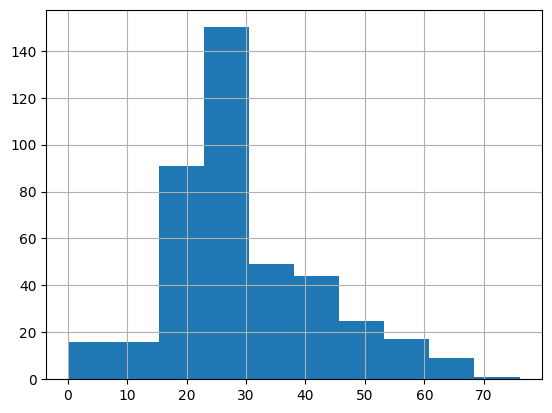

In [ ]:
#After predict the missing values in data['Age']
pf['Age'].hist()

# **Wow incridable**

In [ ]:
print ("The total of missing values in each column:\n");pf.isnull().sum()


The total of missing values in each column:



Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

# **Explaining the dataset:**

In [ ]:
# Calculate the average of "Survived"
survived_average = pf["Survived"].mean()

# Print the average
print("Average of Survived:", survived_average)

Average of Survived: 0.36363636363636365


# **Studying the relationship between the 'Survived' column and the other columns.**

In [ ]:
pf['Sex_Encoded'] = pf['Sex'].map({'male': 1, 'female': 2})

pf[["Sex","Sex_Encoded"]].head(20)

,Sex,Sex_Encoded
0,male,1
1,female,2
2,male,1
3,male,1
4,female,2
5,male,1
6,female,2
7,male,1
8,female,2
9,male,1


Pclass        -0.108615
Sex_Encoded    1.000000
Age           -0.006750
Fare           0.191382
Survived       1.000000
Name: Survived, dtype: float64


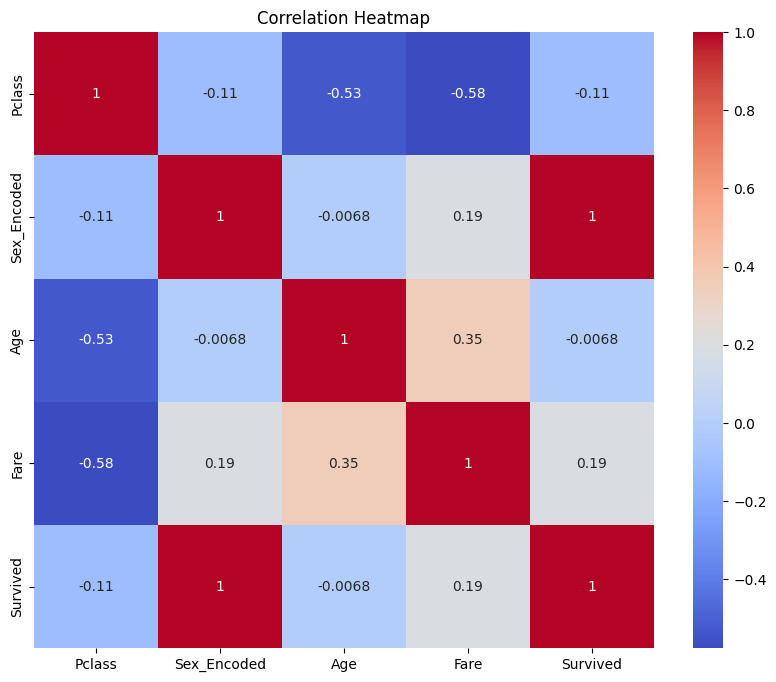

In [ ]:
# Select the desired columns for correlation analysis
selected_columns = ['Pclass', 'Sex_Encoded', 'Age', 'Fare']
subset_df = pf[selected_columns + ['Survived']]

# Compute the correlation matrix
corr_matrix = subset_df.corr()
print(corr_matrix.Survived)

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

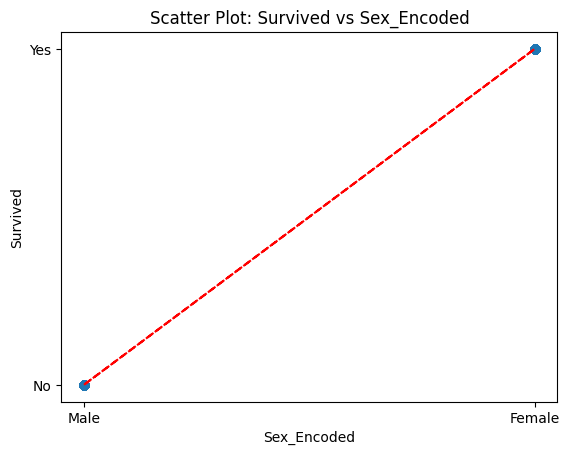

In [ ]:
# Scatter plot
plt.scatter(pf['Sex_Encoded'], pf['Survived'])

# Trend line
z = np.polyfit(pf['Sex_Encoded'], pf['Survived'], 1)
p = np.poly1d(z)
plt.plot(pf['Sex_Encoded'], p(pf['Sex_Encoded']), "r--")

# Plot labels
plt.xlabel('Sex_Encoded')
plt.ylabel('Survived')

# Plot title
plt.title('Scatter Plot: Survived vs Sex_Encoded')
plt.yticks([0, 1], ['No', 'Yes'])
plt.xticks([1,2], ['Male', 'Female'])
# Show the plot
plt.show()

## **Based on the correlation coefficient of 1 between 'Survived' and 'Sex_Encoded', we can draw the following statistical conclusion**

Number of Males: 266
Number of Females: 152
Number of Male Survivors: 0
Number of Female Survivors: 152


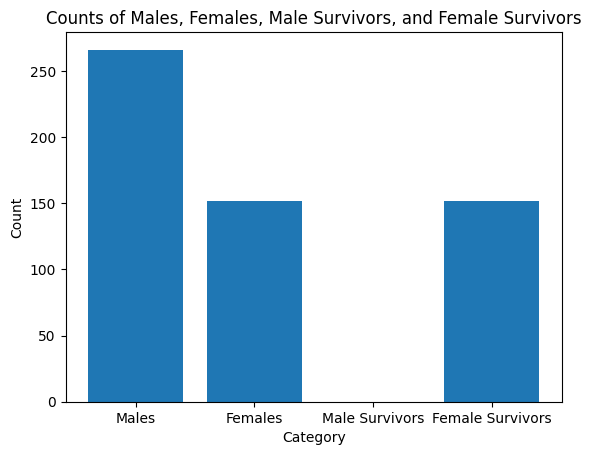

In [ ]:
num_male = len(pf[pf['Sex'] == 'male'])
num_female = len(pf[pf['Sex'] == 'female'])

male_survivors = len(pf[(pf['Sex'] == 'male') & (pf['Survived'] == 1)])
female_survivors = len(pf[(pf['Sex'] == 'female') & (pf['Survived'] == 1)])

print("Number of Males:", num_male)
print("Number of Females:", num_female)
print("Number of Male Survivors:", male_survivors)
print("Number of Female Survivors:", female_survivors)


labels = ['Males', 'Females', 'Male Survivors', 'Female Survivors']
counts = [num_male, num_female, male_survivors, female_survivors]

# Plotting
plt.bar(labels, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Males, Females, Male Survivors, and Female Survivors')

# Display the plot
plt.show()

# **Based on the provided statistics, we can draw the following conclusions**

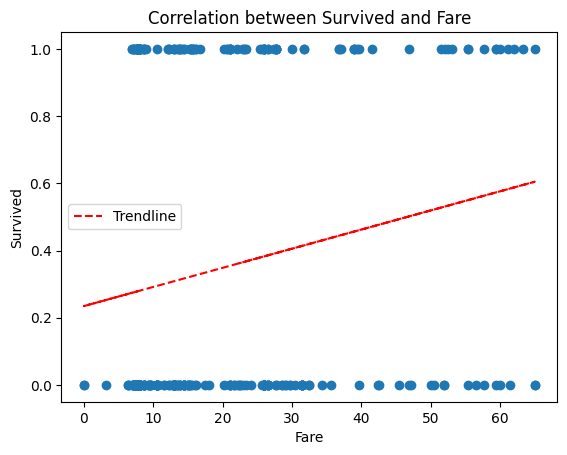

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Q1 = pf['Fare'].quantile(0.25)
Q3 = pf['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the Fare column
cleaned_data = pf[(pf['Fare'] >= lower_bound) & (pf['Fare'] <= upper_bound)]

# Print the cleaned dataset
#print(cleaned_data)


# Calculate the trendline
fit = np.polyfit(cleaned_data['Fare'], cleaned_data['Survived'], 1)
trendline = np.polyval(fit, cleaned_data['Fare'])

# Plot the scatter plot with trendline
plt.scatter(cleaned_data['Fare'], cleaned_data['Survived'])
plt.plot(cleaned_data['Fare'], trendline, color='red', linestyle='--', label='Trendline')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Correlation between Survived and Fare')
plt.legend()
plt.show()

# **Based on the given correlation coefficient of 0.19 between "Survived" and "Fare"**

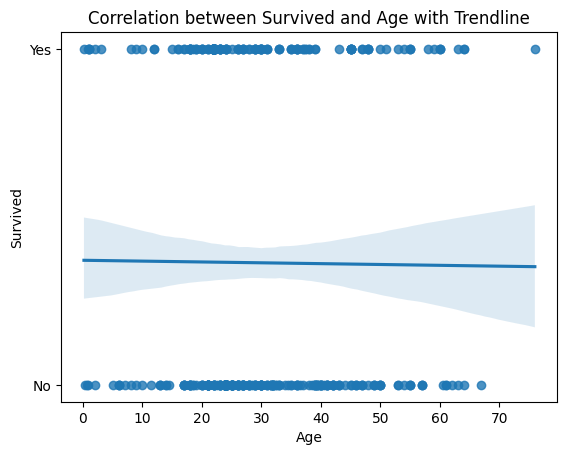

In [ ]:
import seaborn as sns

# Assuming 'data' is your DataFrame containing the 'Survived' and 'Age' columns
sns.regplot(x='Age', y='Survived', data=pf, scatter=True)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Correlation between Survived and Age with Trendline')
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()
